In [1]:
import pandas as pd 
import numpy as np
import jieba 
import matplotlib.pyplot as plt
from wordcloud import WordCloud  
import chardet

# 导入射雕小说文档 

In [2]:
raw=pd.read_table('F:/大三（下）/文本信息处理与应用/文本作业数据/作业数据/金庸-射雕英雄传txt精校版.txt',names=['txt'],encoding='GBK')
print(len(raw))

7432


In [78]:
# 定位段落第一个字
def m_head(tmpstr):
    return tmpstr[:1]

# 定位段落是否包含章节名称关键字“回 ”
def m_mid(tmpstr):
    return tmpstr.find('回 ')

# 接着将函数应用到每一个段落，找到这些定位处的内容
raw['head']=raw.txt.apply(m_head)
raw['mid']=raw.txt.apply(m_mid)
raw['len']=raw.txt.apply(len)
# 查看
raw.loc[raw['len']==8]    

,txt,chap,head,mid,len
33,第一回 风雪惊变,1.0,第,2,8
268,第二回 江南七怪,2.0,第,2,8
475,第三回 黄沙莽莽,3.0,第,2,8
684,第四回 黑风双煞,4.0,第,2,8
894,第五回 弯弓射雕,5.0,第,2,8
1061,第六回 崖顶疑阵,6.0,第,2,8
1286,第七回 比武招亲,7.0,第,2,8
1484,第八回 各显神通,8.0,第,2,8
1619,第九回 铁枪破犁,9.0,第,2,8
1828,第十回 往事如烟,10.0,第,2,8


# 提取出第一章数据

In [79]:
# 再加判断条件，添加章节编号
chapnum=0

for i in range(len(raw)):
    if raw['head'][i]=='第' and raw['mid'][i] >0 and raw['len'][i] < 30: #添加章节编号
        chapnum += 1
    if chapnum >= 40 and raw['txt'][i]=='附录一：成吉思汗家族': #去掉附录
        chapnum=0
    raw.loc[i,'chap']=chapnum  #添加编号一列
    
#添加编号后，可以删除临时变量
del raw['head']
del raw['mid']
del raw['len']

raw.head(50)

,txt,chap
0,全本全集精校小说尽在：http://www.yimuhe.com/u/anglewing26...,0.0
1,更多资源下载：http://qqzone.ctdisk.com,0.0
2,"※声明：本电子书仅供读者预览,请在下载24小时内删除，不得用作商业用途；如果喜欢请购买正版图书！※",0.0
3,------------------------------------------,0.0
4,“金庸作品集”新序,0.0
5,小说是写给人看的。小说的内容是人。,0.0
6,小说写一个人、几个人、一群人、或成千成万人的性格和感情。他们的性格和感情从横面的环境中反...,0.0
7,西洋传统的小说理论分别从环境、人物、情节三个方面去分析一篇作品。由于小说作者不同的个性与...,0.0
8,基本上，武侠小说与别的小说一样，也是写人，只不过环境是古代的，主要人物是有武功的，情节偏...,0.0
9,小说是艺术的一种，艺术的基本内容是人的感情和生命，主要形式是美，广义的、美学上的美。在小...,0.0


In [3]:
def m_head(tmpstr):
    return tmpstr[:1]
def m_mid(tmpstr):
    return tmpstr.find("回 ")
raw['head']=raw.txt
raw['head']=raw.txt.apply(m_head)
raw['mid']=raw.txt.apply(m_mid)
raw['len']=raw.txt.apply(len)
raw.head(50)

,txt,head,mid,len
0,全本全集精校小说尽在：http://www.yimuhe.com/u/anglewing26...,全,-1,55
1,更多资源下载：http://qqzone.ctdisk.com,更,-1,31
2,"※声明：本电子书仅供读者预览,请在下载24小时内删除，不得用作商业用途；如果喜欢请购买正版图书！※",※,-1,49
3,------------------------------------------,-,-1,42
4,“金庸作品集”新序,“,-1,9
5,小说是写给人看的。小说的内容是人。,,-1,19
6,小说写一个人、几个人、一群人、或成千成万人的性格和感情。他们的性格和感情从横面的环境中反...,,-1,227
7,西洋传统的小说理论分别从环境、人物、情节三个方面去分析一篇作品。由于小说作者不同的个性与...,,-1,58
8,基本上，武侠小说与别的小说一样，也是写人，只不过环境是古代的，主要人物是有武功的，情节偏...,,-1,153
9,小说是艺术的一种，艺术的基本内容是人的感情和生命，主要形式是美，广义的、美学上的美。在小...,,-1,135


In [4]:
# 章节判断
chapnum=0
for i in range(len(raw)):
    if raw['head'][i]=='第' and raw['mid'][i]>0 and raw['len'][i]<30:
        chapnum+=1
    if chapnum>=40 and raw['txt'][i]=='附录一：成吉思汗家族':
        chapnum=0
    raw.loc[i,'chap']=chapnum

In [5]:
del raw['head']
del raw['mid']
del raw['len']
raw[raw.chap==1] 

,txt,chap
33,第一回 风雪惊变,1.0
34,,1.0
35,钱塘江浩浩江水，日日夜夜无穷无休的从两浙西路临安府牛家村边绕过，东流入海。江畔一排数十株...,1.0
36,那说话人五十来岁年纪，一件青布长袍早洗得褪成了蓝灰带白。只听他两片梨花木板碰了几下，左手...,1.0
37,几处败垣围故井，向来一一是人家。”,1.0
...,...,...
263,包惜弱听他夸奖自己容貌，内心窃喜，低头道：“我是在热丧之中……”颜烈忙道：“小人理会得。...,1.0
264,颜烈问了途人，径去当地最大的“秀水客栈”投店。漱洗罢，颜烈与包惜弱一起吃了些点心，两人相...,1.0
265,过了一会，颜烈道：“娘子请自宽便，小人出去买了物品就回。”包惜弱点了点头，道：“相公可别...,1.0
266,,1.0


In [6]:
# 拼接方法1
chapter=raw.groupby('chap').agg('sum')
chapter=chapter[chapter.index!=0]
chapter.index=chapter.index.astype('int')
chapter_1=chapter.txt[1]
chapter_1 

'第一回 风雪惊变\u3000\u3000\u3000\u3000钱塘江浩浩江水，日日夜夜无穷无休的从两浙西路临安府牛家村边绕过，东流入海。江畔一排数十株乌柏树，叶子似火烧般红，正是八月天时。村前村后的野草刚起始变黄，一抹斜阳映照之下，更增了几分萧索。两株大松树下围着一堆村民，男男女女和十几个小孩，正自聚精会神的听着一个瘦削的老者说话。\u3000\u3000那说话人五十来岁年纪，一件青布长袍早洗得褪成了蓝灰带白。只听他两片梨花木板碰了几下，左手中竹棒在一面小羯鼓上敲起得得连声。唱道：“小桃无主自开花，烟草茫茫带晚鸦。\u3000\u3000几处败垣围故井，向来一一是人家。”\u3000\u3000那说话人将木板敲了几下，说道：“这首七言诗，说的是兵火过后，原来的家家户户，都变成了断墙残瓦的破败之地。小人刚才说到那叶老汉一家四口，悲欢离合，聚了又散，散了又聚。他四人给金兵冲散，好容易又再团聚，欢天喜地地回到故乡卫州，却见房屋已给金兵烧得干干净净，无可奈何，只得去到京城汴梁，想觅个生计。不料想：天有不测风云，人有旦夕祸福。他四人刚进汴梁城，迎面便过来一队金兵。带兵的头儿一双三角眼觑将过去，见那叶三姐生得美貌，跳下马来，当即一把抱住，哈哈大笑，便将她放上了马鞍，说道：‘小姑娘，跟我回家，服侍老爷。’那叶三姐如何肯从？拼命挣扎。那金兵长官喝道：‘你不肯从我，便杀了你的父母兄弟！’提起狼牙棒，一棒打在那叶四郎的头上，登时脑浆迸裂，一命呜呼。正是：阴世新添枉死鬼，阳间不见少年人！\u3000\u3000“叶老汉和叶妈妈吓得呆了，扑将上去，搂住了儿子的尸体，放声大哭。那长官提起狼牙棒，一棒一个，又都了帐。那叶三姐却不啼哭，说道：‘长官休得凶恶，我跟你回家便了！’那长官大喜，将叶三姐带得回家。不料叶三姐觑他不防，突然抢步过去，拔出那长官的腰刀，对准了他心口，挺刀刺将过去，说时迟，那时快，这钢刀刺去，眼见便可报得父母兄弟的大仇。不料那长官久经战阵，武艺精熟，顺手一推，叶三姐登时摔了出去。那长官刚骂得一声：‘小贱人！’叶三姐已举起钢刀，在脖子中一勒。可怜她：花容月貌无双女，惆怅芳魂赴九泉。”\u3000\u3000他说一段，唱一段，只听得众村民无不咬牙切齿，愤怒叹息。\u3000\u3000那人又道：“众位听了，常言道得好：\u3000\u3000为人切莫用欺心，举头三尺有神明。\u

In [80]:
# 拼接方法2

t=''
for i in range(0,len(raw[raw['chap']==1])):
    #t.append(raw[raw['chap']==1].iloc[i].txt.strip())  #列表形式
    t=t+raw[raw['chap']==1].iloc[i].txt.strip()        #字符串拼接
print(t)

第一回 风雪惊变钱塘江浩浩江水，日日夜夜无穷无休的从两浙西路临安府牛家村边绕过，东流入海。江畔一排数十株乌柏树，叶子似火烧般红，正是八月天时。村前村后的野草刚起始变黄，一抹斜阳映照之下，更增了几分萧索。两株大松树下围着一堆村民，男男女女和十几个小孩，正自聚精会神的听着一个瘦削的老者说话。那说话人五十来岁年纪，一件青布长袍早洗得褪成了蓝灰带白。只听他两片梨花木板碰了几下，左手中竹棒在一面小羯鼓上敲起得得连声。唱道：“小桃无主自开花，烟草茫茫带晚鸦。几处败垣围故井，向来一一是人家。”那说话人将木板敲了几下，说道：“这首七言诗，说的是兵火过后，原来的家家户户，都变成了断墙残瓦的破败之地。小人刚才说到那叶老汉一家四口，悲欢离合，聚了又散，散了又聚。他四人给金兵冲散，好容易又再团聚，欢天喜地地回到故乡卫州，却见房屋已给金兵烧得干干净净，无可奈何，只得去到京城汴梁，想觅个生计。不料想：天有不测风云，人有旦夕祸福。他四人刚进汴梁城，迎面便过来一队金兵。带兵的头儿一双三角眼觑将过去，见那叶三姐生得美貌，跳下马来，当即一把抱住，哈哈大笑，便将她放上了马鞍，说道：‘小姑娘，跟我回家，服侍老爷。’那叶三姐如何肯从？拼命挣扎。那金兵长官喝道：‘你不肯从我，便杀了你的父母兄弟！’提起狼牙棒，一棒打在那叶四郎的头上，登时脑浆迸裂，一命呜呼。正是：阴世新添枉死鬼，阳间不见少年人！“叶老汉和叶妈妈吓得呆了，扑将上去，搂住了儿子的尸体，放声大哭。那长官提起狼牙棒，一棒一个，又都了帐。那叶三姐却不啼哭，说道：‘长官休得凶恶，我跟你回家便了！’那长官大喜，将叶三姐带得回家。不料叶三姐觑他不防，突然抢步过去，拔出那长官的腰刀，对准了他心口，挺刀刺将过去，说时迟，那时快，这钢刀刺去，眼见便可报得父母兄弟的大仇。不料那长官久经战阵，武艺精熟，顺手一推，叶三姐登时摔了出去。那长官刚骂得一声：‘小贱人！’叶三姐已举起钢刀，在脖子中一勒。可怜她：花容月貌无双女，惆怅芳魂赴九泉。”他说一段，唱一段，只听得众村民无不咬牙切齿，愤怒叹息。那人又道：“众位听了，常言道得好：为人切莫用欺心，举头三尺有神明。若还作恶无报应，天下凶徒人吃人。“可是那金兵占了我大宋天下，杀人放火，奸淫掳掠，无恶不作，却又不见他遭到什么报应。只怪我大宋官家不争气，我中国本来兵多将广，可是一见到金兵到来，便远远地逃之夭夭，只剩下老百姓遭殃。好似那叶三

# 对第一章小说文本利用结巴进行分词，去除停用词

In [81]:
# 分词
dict=pd.read_table('F:/大三（下）/文本信息处理与应用/文本作业数据/作业数据/金庸小说词库.txt')
dict1=dict.astype(str)
jieba.load_userdict(dict1) 
'/'.join(jieba.cut(t)) 

'第一回/ /风雪/惊变/钱塘江/浩浩/江水/，/日日夜夜/无穷/无休/的/从/两/浙西/路/临安/府/牛家村/边/绕过/，/东/流入/海/。/江畔/一排/数十株/乌/柏树/，/叶子/似/火烧/般红/，/正是/八月/天时/。/村前村后/的/野草/刚/起始/变黄/，/一抹/斜阳/映照/之下/，/更增/了/几分/萧索/。/两株/大/松树/下/围着/一堆/村民/，/男男女女/和/十几个/小孩/，/正自/聚精会神/的/听/着/一个/瘦削/的/老者/说话/。/那/说话/人/五十/来/岁/年纪/，/一件/青布/长袍/早洗/得/褪成/了/蓝灰/带白/。/只/听/他/两片/梨花/木板/碰/了/几下/，/左手/中/竹棒/在/一面/小/羯鼓/上/敲起/得/得/连声/。/唱道/：/“/小桃/无主自/开花/，/烟草/茫茫/带/晚鸦/。/几处/败垣围/故井/，/向来/一一/是/人家/。/”/那/说话/人/将/木板/敲/了/几下/，/说道/：/“/这首/七言诗/，/说/的/是/兵火/过后/，/原来/的/家家户户/，/都/变成/了/断/墙/残瓦/的/破败/之地/。/小人/刚才/说/到/那/叶老汉/一家/四口/，/悲欢离合/，/聚/了/又/散/，/散/了/又/聚/。/他四人/给/金兵/冲散/，/好容易/又/再/团聚/，/欢天喜地/地/回到/故乡/卫州/，/却/见/房屋/已/给/金兵/烧/得/干干净净/，/无可奈何/，/只得/去/到/京城/汴梁/，/想/觅/个/生计/。/不/料想/：/天有不测风云/，/人有旦夕祸福/。/他四人/刚进/汴梁/城/，/迎面/便/过来/一队/金兵/。/带兵/的/头儿/一双/三角/眼觑/将/过去/，/见/那/叶三姐/生/得/美貌/，/跳/下马/来/，/当即/一把/抱住/，/哈哈大笑/，/便/将/她/放上/了/马鞍/，/说道/：/‘/小姑娘/，/跟/我/回家/，/服侍/老爷/。/’/那/叶三姐/如何/肯/从/？/拼命/挣扎/。/那金兵/长官/喝道/：/‘/你/不肯/从/我/，/便/杀/了/你/的/父母/兄弟/！/’/提起/狼牙棒/，/一/棒打/在/那/叶四郎/的/头上/，/登时/脑浆/迸裂/，/一命呜呼/。/正是/：/阴世/新添/枉死鬼/，/阳间/不见/少年人/！/“/叶老汉/和/叶/妈妈/吓/得/呆/了/，/扑/将/上去/，/搂住/了/儿子/的/尸体/，/放声大哭/。/那/

In [82]:
# 去停用词
tmpdf=pd.read_csv('F:/大三（下）/文本信息处理与应用/文本作业数据/作业数据/停用词.txt',names=['w'],sep='aaa',encoding='utf-8')
words=[w for w in jieba.cut(t) if w not in list(tmpdf.w)]
words 

<ipython-input-82-8a39d881ad3f>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tmpdf=pd.read_csv('F:/大三（下）/文本信息处理与应用/文本作业数据/作业数据/停用词.txt',names=['w'],sep='aaa',encoding='utf-8')


['第一回',
 ' ',
 '风雪',
 '惊变',
 '钱塘江',
 '浩浩',
 '江水',
 '日日夜夜',
 '无穷',
 '无休',
 '两',
 '浙西',
 '路',
 '临安',
 '府',
 '牛家村',
 '绕过',
 '东',
 '流入',
 '海',
 '江畔',
 '一排',
 '数十株',
 '乌',
 '柏树',
 '叶子',
 '似',
 '火烧',
 '般红',
 '八月',
 '天时',
 '村前村后',
 '野草',
 '刚',
 '起始',
 '变黄',
 '一抹',
 '斜阳',
 '映照',
 '之下',
 '更增',
 '几分',
 '萧索',
 '两株',
 '松树',
 '围着',
 '一堆',
 '村民',
 '男男女女',
 '十几个',
 '小孩',
 '正自',
 '聚精会神',
 '听',
 '一个',
 '瘦削',
 '老者',
 '说话',
 '说话',
 '五十',
 '岁',
 '年纪',
 '一件',
 '青布',
 '长袍',
 '早洗',
 '褪成',
 '蓝灰',
 '带白',
 '听',
 '两片',
 '梨花',
 '木板',
 '碰',
 '几下',
 '左手',
 '中',
 '竹棒',
 '羯鼓',
 '敲起',
 '唱道',
 '小桃',
 '无主自',
 '开花',
 '烟草',
 '茫茫',
 '带',
 '晚鸦',
 '几处',
 '败垣围',
 '故井',
 '向来',
 '说话',
 '木板',
 '敲',
 '几下',
 '说道',
 '这首',
 '七言诗',
 '说',
 '兵火',
 '过后',
 '家家户户',
 '断',
 '墙',
 '残瓦',
 '破败',
 '之地',
 '小人',
 '说',
 '叶老汉',
 '一家',
 '四口',
 '悲欢离合',
 '聚',
 '散',
 '散',
 '聚',
 '他四人',
 '金兵',
 '冲散',
 '好容易',
 '团聚',
 '欢天喜地',
 '回到',
 '故乡',
 '卫州',
 '见',
 '房屋',
 '金兵',
 '烧',
 '干干净净',
 '无可奈何',
 '只得',
 '京城',
 '汴梁',
 '想',
 '觅',
 '生计',
 '料想',
 '天有不测风云',
 '人有旦夕祸福

In [83]:
import jieba.analyse as ana 
ana.set_stop_words('F:/大三（下）/文本信息处理与应用/文本作业数据/作业数据/停用词.txt')
jieba.cut(chapter_1)

<generator object Tokenizer.cut at 0x000002BE026FE350>

In [84]:
words2=ana.extract_tags(t,topK=20)
words2 

['杨铁心',
 '包惜弱',
 '郭啸天',
 '颜烈',
 '丘处机',
 '武官',
 '杨二人',
 '官兵',
 '曲三',
 '金兵',
 '那道人',
 '道长',
 '娘子',
 '段天德',
 '临安',
 '说道',
 '丈夫',
 '杨家枪',
 '两人',
 '一声']

In [85]:
df=pd.DataFrame(words2,columns=['word'])
df.head(30)

,word
0,杨铁心
1,包惜弱
2,郭啸天
3,颜烈
4,丘处机
5,武官
6,杨二人
7,官兵
8,曲三
9,金兵


In [86]:
result=df.groupby(['word']).size()
freqlist=result.sort_values(ascending=False)
freqlist[:20]

word
颜烈     1
金兵     1
丈夫     1
丘处机    1
两人     1
临安     1
包惜弱    1
娘子     1
官兵     1
曲三     1
杨二人    1
杨家枪    1
杨铁心    1
武官     1
段天德    1
说道     1
道长     1
那道人    1
郭啸天    1
一声     1
dtype: int64

In [87]:
import nltk 
freqlist[:10] 

word
颜烈     1
金兵     1
丈夫     1
丘处机    1
两人     1
临安     1
包惜弱    1
娘子     1
官兵     1
曲三     1
dtype: int64

# 将分词后的结果利用参考资料中的图片绘制词云展示并将图片保存本地

In [90]:
fdist=nltk.FreqDist(words) #生成完整的词条频数字典
# 列出词条矩阵
fdist.keys() 

dict_keys(['第一回', ' ', '风雪', '惊变', '钱塘江', '浩浩', '江水', '日日夜夜', '无穷', '无休', '两', '浙西', '路', '临安', '府', '牛家村', '绕过', '东', '流入', '海', '江畔', '一排', '数十株', '乌', '柏树', '叶子', '似', '火烧', '般红', '八月', '天时', '村前村后', '野草', '刚', '起始', '变黄', '一抹', '斜阳', '映照', '之下', '更增', '几分', '萧索', '两株', '松树', '围着', '一堆', '村民', '男男女女', '十几个', '小孩', '正自', '聚精会神', '听', '一个', '瘦削', '老者', '说话', '五十', '岁', '年纪', '一件', '青布', '长袍', '早洗', '褪成', '蓝灰', '带白', '两片', '梨花', '木板', '碰', '几下', '左手', '中', '竹棒', '羯鼓', '敲起', '唱道', '小桃', '无主自', '开花', '烟草', '茫茫', '带', '晚鸦', '几处', '败垣围', '故井', '向来', '敲', '说道', '这首', '七言诗', '说', '兵火', '过后', '家家户户', '断', '墙', '残瓦', '破败', '之地', '小人', '叶老汉', '一家', '四口', '悲欢离合', '聚', '散', '他四人', '金兵', '冲散', '好容易', '团聚', '欢天喜地', '回到', '故乡', '卫州', '见', '房屋', '烧', '干干净净', '无可奈何', '只得', '京城', '汴梁', '想', '觅', '生计', '料想', '天有不测风云', '人有旦夕祸福', '刚进', '城', '迎面', '便', '一队', '带兵', '头儿', '一双', '三角', '眼觑', '叶三姐', '生', '美貌', '跳', '下马', '一把', '抱住', '哈哈大笑', '放上', '马鞍', '‘', '小姑娘', '回家', '服侍', '老爷', '’', '肯', '拼命', '挣扎', '那金兵', 

In [91]:
fdist.tabulate(10)

  道 杨铁心 包惜弱 郭啸天   见   说   …  官兵   便  武官 
210 148 114  67  60  59  54  44  43  42 


In [96]:
fdist.most_common(100) 

[('道', 210),
 ('杨铁心', 148),
 ('包惜弱', 114),
 ('郭啸天', 67),
 ('见', 60),
 ('说', 59),
 ('…', 54),
 ('官兵', 44),
 ('便', 43),
 ('武官', 42),
 ('郭', 37),
 ('颜烈', 37),
 ('听', 36),
 ('丘处机', 36),
 ('说道', 35),
 ('中', 34),
 ('一个', 32),
 ('杨二人', 32),
 ('金兵', 30),
 ('一声', 29),
 ('丈夫', 28),
 ('笑', 27),
 ('娘子', 27),
 ('两人', 26),
 ('吃', 25),
 ('那道人', 24),
 ('道长', 23),
 ('杀', 22),
 ('临安', 21),
 ('请', 21),
 ('倒', 21),
 ('小人', 20),
 ('出', 20),
 ('瞧', 20),
 ('皇帝', 20),
 ('做', 20),
 ('曲三', 20),
 ('地下', 18),
 ('心中', 18),
 ('只见', 17),
 ('妻子', 17),
 ('段天德', 17),
 ('兄弟', 16),
 ('身上', 16),
 ('一阵', 15),
 ('两位', 15),
 ('心想', 15),
 ('一名', 15),
 ('时', 15),
 ('那人', 14),
 ('一只', 14),
 ('张', 14),
 ('喝', 14),
 ('没', 14),
 ('三人', 14),
 ('事', 14),
 ('更', 14),
 ('走', 14),
 ('死', 14),
 ('两个', 13),
 ('脸上', 13),
 ('杨家枪', 13),
 ('道人', 13),
 ('想', 12),
 ('下马', 12),
 ('回家', 12),
 ('喝道', 12),
 ('住', 12),
 ('里', 12),
 ('百姓', 12),
 ('双手', 12),
 ('秦桧', 12),
 ('曲', 12),
 ('身子', 12),
 ('尸首', 12),
 ('短剑', 12),
 ('十五道', 11),
 ('坐', 11),
 ('

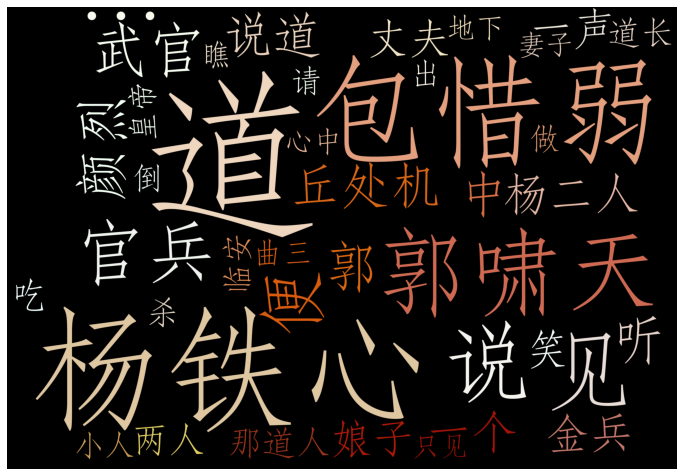

In [97]:
import wordcloud
from PIL import Image
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from imageio import imread

mask = np.array(Image.open('F:/大三（下）/文本信息处理与应用/文本作业数据/作业数据/射雕背景2.png')) 
wc = wordcloud.WordCloud(
     font_path='C:\Windows\Fonts\STFANGSO.ttf',
     mask=mask, # 设置背景图
     width=1000, height=600, min_font_size=30,
     max_font_size=200, scale=4)

wc.generate_from_frequencies(fdist)
image_colors = wordcloud.ImageColorGenerator(mask)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis('off') # 关闭坐标轴
plt.show()

In [98]:
wc.to_file('F:/大三（下）/文本信息处理与应用/文本作业数据/作业数据/射雕词云1.jpg')  